In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context("paper")
plt.rcParams['savefig.dpi'] = 300
rs = np.random.RandomState(8)


PATH_C_CONLL = Path("data", "wandb_best_conll.csv")
PATH_C_WNUT = Path("data", "wandb_best_wnut.csv")
PATH_C_MIT = Path("data", "wandb_best_mit.csv")
c_conll_name = "CoNLL 2003"
c_wnut_name = "WNUT 2017"

save_path = Path(os.getcwd(), "output_figs", "best_run_fig.png")

In [2]:
df_c_conll = pd.read_csv(PATH_C_CONLL)
relevant_cols_c = [el for el in df_c_conll.columns.to_list() if el not in ["macro avg", "weighted avg"]]
df_c_conll = df_c_conll.loc[df_c_conll["metric"] == "f1-score", relevant_cols_c].reset_index(drop=True)
df_c_conll

,metric,PER,ORG,LOC,MISC,micro avg
0,f1-score,0.786271,0.51845,0.687811,0.476849,0.642889


In [3]:
df_c_wnut = pd.read_csv(PATH_C_WNUT)
relevant_cols_w = [el for el in df_c_wnut.columns.to_list() if el not in ["macro avg", "weighted avg"]]
df_c_wnut = df_c_wnut.loc[0:2, :]
df_c_wnut = df_c_wnut.loc[df_c_wnut["metric"] == "f1-score", relevant_cols_w].reset_index(drop=True)
df_c_wnut

,metric,person,group,location,creative-work,product,corporation,micro avg
0,f1-score,0.600751,0.153061,0.343284,0.090566,0.095238,0.114286,0.318062


In [4]:
df_c_mit = pd.read_csv(PATH_C_MIT)
relevant_cols_w = [el for el in df_c_mit.columns.to_list() if el not in ["macro avg", "weighted avg"]]
df_c_mit = df_c_mit.loc[0:2, :]
df_c_mit = df_c_mit.loc[df_c_mit["metric"] == "f1-score", relevant_cols_w].reset_index(drop=True)
df_c_mit

,metric,Location,Cuisine,Restaurant_Name,Amenity,Dish,Hours,Rating,Price,micro avg
0,f1-score,0.601372,0.535188,0.491342,0.364231,0.526611,0.225989,0.634855,0.532407,0.503736


In [5]:
# # Create the heatmap
# fig, ax = plt.subplots()
# fig.set_size_inches(8, 6)

# heatmap = ax.pcolor(
#     df_c_conll,
#     cmap=sns.color_palette("Set2", as_cmap=True),
#     vmin = np.min(data_array) - 0.15,
#     vmax = np.max(data_array) + 0.15,
# )

# # Add labels and title
# ax.set_xticks(np.arange(len(labels)) + 0.5)
# ax.set_xticklabels(labels, rotation=45, ha='right')

# ax.set_yticks(np.arange(3) + 0.5)
# ax.set_yticklabels(["Precision", "Recall", "F1-Score"])

# ax.set_title(f"Classification Heatmap of best {c_conll_name} run")

# # Add colorbar
# fig.colorbar(heatmap, label="Score")

# format_grid_value = lambda x: "{:.4f}".format(x)

# # Loop through each cell and set the text with value
# for (i, j), z in np.ndenumerate(data_array):
#     ax.text(j + 0.5, i, format_grid_value(z), ha='center', va='center', fontsize=8,
#             bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

# fig.tight_layout()
# fig.savefig(save_path, bbox_inches='tight')
# fig.canvas.draw()

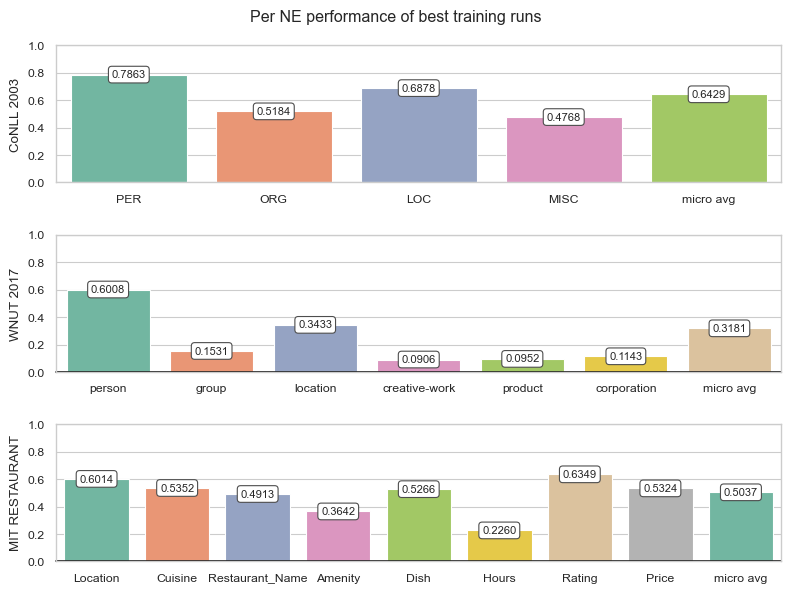

In [6]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 6))
format_grid_value = lambda x: "{:.4f}".format(x)

# conll
x1= df_c_conll.columns.to_list()[1:]
y1 = df_c_conll.loc[0,df_c_conll.columns[1]:]
sns.barplot(x=x1, y=y1, hue=x1, palette="Set2", ax=ax1)
# ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("CoNLL 2003")
ax1.set(ylim=(0, 1))

for rect, label in zip(ax1.patches, y1):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height, format_grid_value(label), ha="center", va="center", fontsize=8,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')
    )
    
# wnut
x2 = df_c_wnut.columns.to_list()[1:]
y2 = df_c_wnut.loc[0, df_c_wnut.columns[1]:]
sns.barplot(x=x2, y=y2, hue=x2, palette="Set2", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("WNUT 2017")
ax2.set(ylim=(0, 1))

for rect, label in zip(ax2.patches, y2):
    height = rect.get_height()
    ax2.text(
        rect.get_x() + rect.get_width() / 2, height, format_grid_value(label), ha="center", va="center", fontsize=8,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')
    )
    
# mit
x3 = df_c_mit.columns.to_list()[1:]
y3 = df_c_mit.loc[0, df_c_mit.columns[1]:]
sns.barplot(x=x3, y=y3, hue=x3, palette="Set2", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("MIT RESTAURANT")
ax3.set(ylim=(0, 1))

for rect, label in zip(ax3.patches, y3):
    height = rect.get_height()
    ax3.text(
        rect.get_x() + rect.get_width() / 2, height, format_grid_value(label), ha="center", va="center", fontsize=8,
        bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')
    )
    
# Finalize the plot
f.suptitle("Per NE performance of best training runs")
plt.tight_layout(h_pad=2)
plt.savefig(save_path)